<a href="https://colab.research.google.com/github/Rana-S-Ali/Python/blob/main/Python-pivot_charts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab: Pivot Charts**


Estimated time needed: **30** minutes


## Introduction
In this lab, you will learn how to use pivot charts for data analysis. Pivot charts play a crucial role in data analytics by enabling quick and intuitive exploration of multidimensional datasets. They allow analysts to summarize and visualize complex data relationships across multiple variables, facilitating insights that might be obscured in raw data tables. By dynamically aggregating and pivoting data, these charts provide a comprehensive view of trends, patterns, and correlations, empowering decision-makers to identify key factors influencing outcomes. Pivot charts enhance data-driven decision-making processes by simplifying complex data into actionable visual representations, thereby accelerating understanding and fostering informed strategies in diverse fields such as business analytics, market research, and scientific studies.


## Objectives

After completing this lab you will be able to:

 - Use Pivot charts for data analytics
 - Use different types of charts for different scenarios
 - Make deeper inferences from data based on the pivoted representations


----


## Setup


For this lab, we will be using the following libraries:

*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.
*   [`sqlite3`](https://docs.python.org/3/library/sqlite3.html) for accessing the database


### Installing Required Libraries

Execute the following code to install the required libraries on the interface


In [1]:
# %pip install pandas seaborn

### Importing Required Libraries

All libraries required for the codes below should be imported here.


In [2]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt

### Download the database
Download the databaset from the cloud server by executing the code statement below.


In [3]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-08-20 23:45:08--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  39.2MB/s    in 0.9s    

2024-08-20 23:45:09 (39.2 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Load the database and read the data table as a Pandas dataframe for further usage, by executing the following code.


In [4]:
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection
QUERY = """SELECT * FROM master"""
df = pd.read_sql(QUERY,conn)

In [5]:
# df.head(20)
df['JobSat'].unique()

array(['Slightly satisfied', 'Very satisfied',
       'Neither satisfied nor dissatisfied', 'Slightly dissatisfied',
       'Very dissatisfied', None], dtype=object)

In [6]:
df['CareerSat'].unique()

array(['Very satisfied', 'Slightly satisfied', 'Very dissatisfied',
       'Slightly dissatisfied', 'Neither satisfied nor dissatisfied'],
      dtype=object)

<Axes: xlabel='JobSat', ylabel='Respondent'>

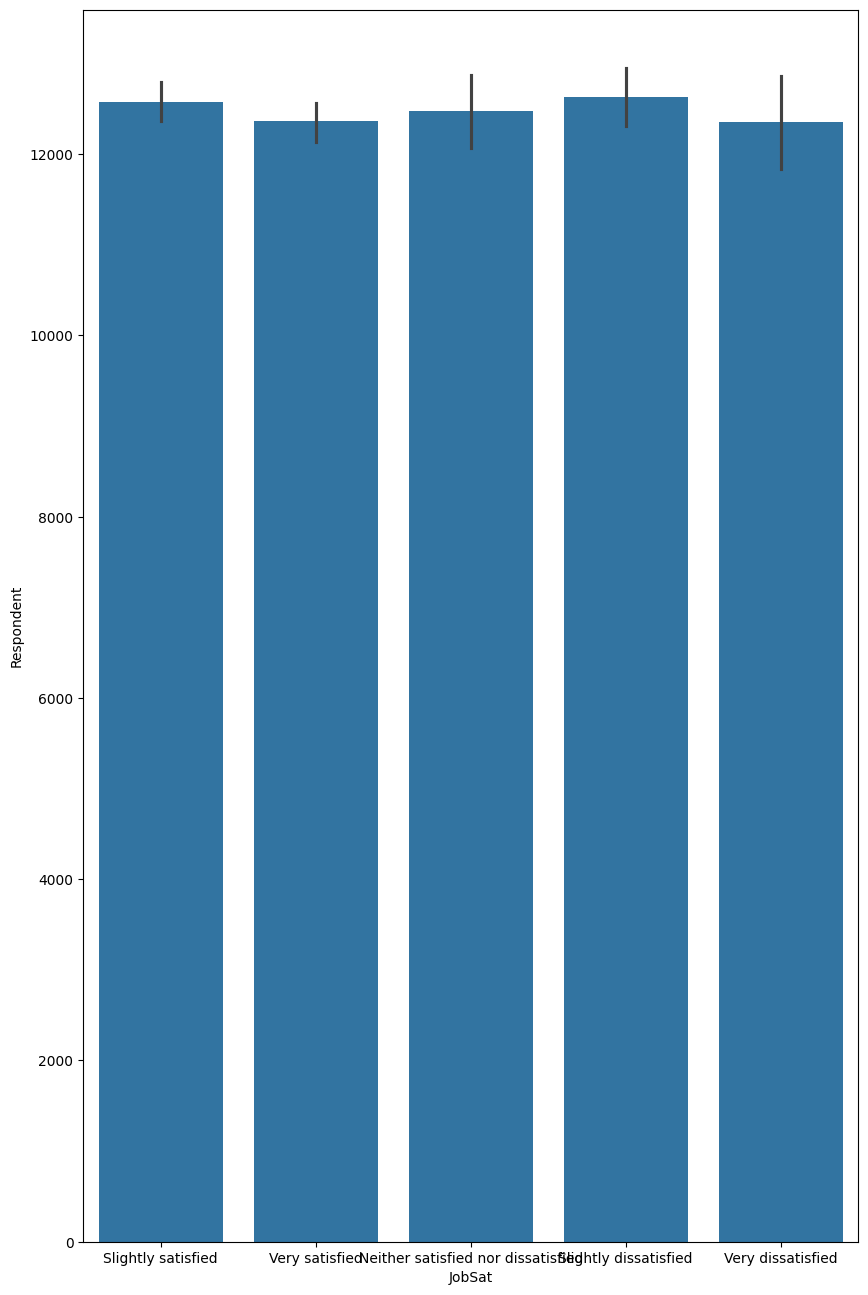

In [7]:
plt.figure(figsize=(10, 16))
sns.barplot(x='JobSat', y='Respondent', data=df)
# draw line plot for CareerSat and JobSat on x-axis vs Respondent
# plt.line

### Scenario 1: Distribution of Respondents by Career Satisfaction and Job Satisfaction


In the first task, you can plot a distribution of the distribution of the respondents in terms of their Career Satisfaction and Job satisfaction. For this, we need to create a pivot with one of the axis representing unique values of `CareerSat` field, another axis representing `JobSat` values, and the data to be shown under each map to be set as the count of respondents. To achieve this, you can execute the code block shared below.


In [8]:
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)
print(pivot_table)

JobSat                              Neither satisfied nor dissatisfied  \
CareerSat                                                                
Neither satisfied nor dissatisfied                                 347   
Slightly dissatisfied                                              126   
Slightly satisfied                                                 567   
Very dissatisfied                                                   36   
Very satisfied                                                     209   

JobSat                              Slightly dissatisfied  Slightly satisfied  \
CareerSat                                                                       
Neither satisfied nor dissatisfied                    270                 209   
Slightly dissatisfied                                 595                 149   
Slightly satisfied                                    573                2188   
Very dissatisfied                                     122                  4

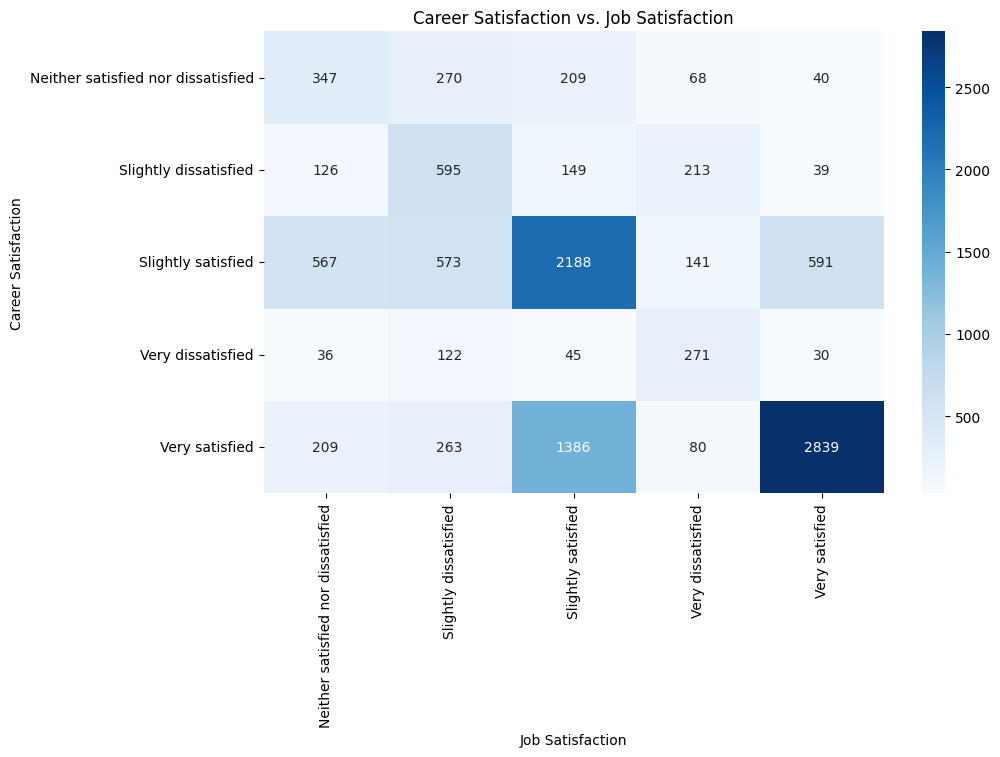

In [9]:
pivot_table = pd.pivot_table(df, index='CareerSat', columns='JobSat', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap='Blues', fmt='g')
plt.title('Career Satisfaction vs. Job Satisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Career Satisfaction')
plt.show()

#### Inference:
Using a heatmap to visualize the relationship between career satisfaction and job satisfaction provides a clear overview of satisfaction levels across different dimensions. We can see that people 'Very Satisfied' with their current jobs are also 'Very Satisfied' with their careers.


### Scenario 2: Comparison of Open Source Adoption Across Operating Systems
In this scenario, you can visualize the adoption of Open Sourse systems across different operating systems by the respondents. To create this pivot chart, the `index` parameter, representing the x-axis, can be set as `OpSys`and the `columns` parameter can be set as `OpenSource`. The `values` parameter will be set as `Respondent` with aggregation function as `count`. This graph should be plotted as a grouped bar graph.

As a practice exercise, try to complete the code block below to generate the pivot chart yourself. Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


In [10]:
df.columns

Index(['index', 'Respondent', 'MainBranch', 'Hobbyist', 'OpenSourcer',
       'OpenSource', 'Employment', 'Country', 'Student', 'EdLevel',
       'UndergradMajor', 'OrgSize', 'YearsCode', 'Age1stCode', 'YearsCodePro',
       'CareerSat', 'JobSat', 'MgrIdiot', 'MgrMoney', 'MgrWant', 'JobSeek',
       'LastHireDate', 'FizzBuzz', 'ResumeUpdate', 'CurrencySymbol',
       'CurrencyDesc', 'CompTotal', 'CompFreq', 'ConvertedComp', 'WorkWeekHrs',
       'WorkRemote', 'WorkLoc', 'ImpSyn', 'CodeRev', 'CodeRevHrs', 'UnitTests',
       'PurchaseHow', 'PurchaseWhat', 'OpSys', 'BlockchainOrg', 'BlockchainIs',
       'BetterLife', 'ITperson', 'OffOn', 'SocialMedia', 'Extraversion',
       'ScreenName', 'SOVisit1st', 'SOVisitFreq', 'SOFindAnswer',
       'SOTimeSaved', 'SOHowMuchTime', 'SOAccount', 'SOPartFreq', 'SOJobs',
       'EntTeams', 'SOComm', 'WelcomeChange', 'Age', 'Trans', 'Dependents',
       'SurveyLength', 'SurveyEase'],
      dtype='object')

In [11]:
df[['Respondent','OpSys','OpenSource']].head()

,Respondent,OpSys,OpenSource
0,4,Windows,The quality of OSS and closed source software ...
1,9,MacOS,The quality of OSS and closed source software ...
2,13,Windows,"OSS is, on average, of HIGHER quality than pro..."
3,16,Windows,The quality of OSS and closed source software ...
4,17,Linux-based,The quality of OSS and closed source software ...


<Figure size 1000x600 with 0 Axes>

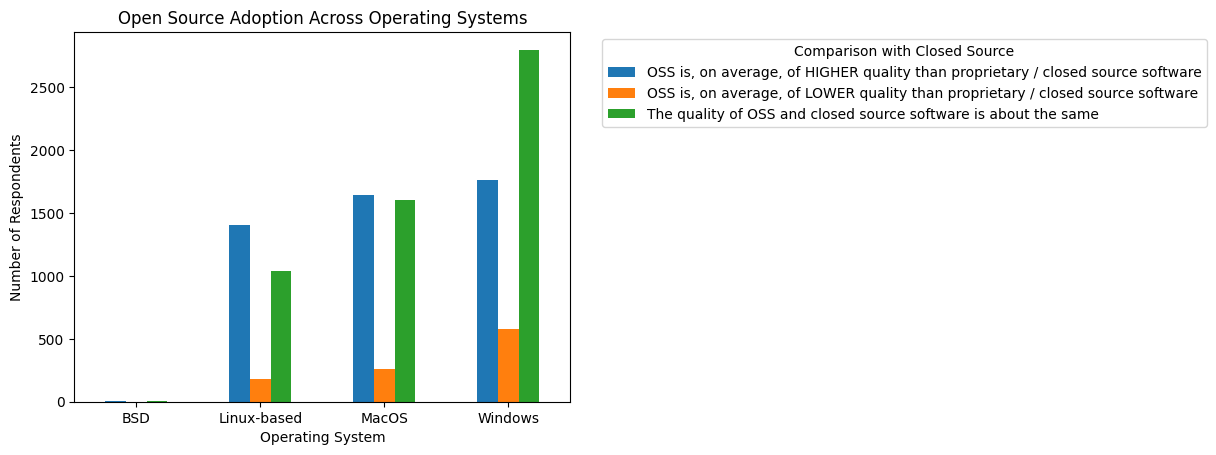

In [12]:

pivot_table = pd.pivot_table(df, index='OpSys', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)
pivot_table
# Plotting
plt.figure(figsize=(10, 6))
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source',loc='best', bbox_to_anchor=(1.05, 1)) # place legend outside of the plot
plt.xticks(rotation=0)
plt.show()

<details><Summary>Click here for the solution</Summary>

```python
pivot_table = pd.pivot_table(df, index='Opr', columns='OpenSource', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar')
plt.title('Open Source Adoption Across Operating Systems')
plt.xlabel('Operating System')
plt.ylabel('Number of Respondents')
plt.legend(title='Comparison with Closed Source')
plt.xticks(rotation=0)
plt.show()
```
</details>


### Scenario 3: Job Satisfaction and Career Aspirations by Employment Status

In this scenario, you can explore a deeper interpretation of the data using Pivot charts. Let us explore how employment status and job satisfaction affects the career aspirations of the respondents.

For this, you need to create a pivot table with 'Employment' and 'JobSat' fields as index, 'MgrWant' field as columns and 'Respondent' as values with aggregation function as 'count'. Complete the following code block to generate the said pivot chart.

Upon creation of the pivot chart, you can draw the inferences based on the visible distribution.


In [13]:
df[['Respondent','Employment','JobSat','MgrWant']]

,Respondent,Employment,JobSat,MgrWant
0,4,Employed full-time,Slightly satisfied,Not sure
1,9,Employed full-time,Slightly satisfied,Not sure
2,13,Employed full-time,Very satisfied,None
3,16,Employed full-time,Slightly satisfied,No
4,17,Employed full-time,Neither satisfied nor dissatisfied,No
...,...,...,...,...
11393,25136,Employed full-time,Slightly satisfied,Yes
11394,25137,Employed full-time,Slightly satisfied,Not sure
11395,25138,Employed full-time,Slightly dissatisfied,No
11396,25141,Employed full-time,Slightly dissatisfied,No


In [14]:
# pivot_table = pd.pivot_table(df, index=['Employment','JobSat'], columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)
# pivot_table
# # Plotting

# plt.figure(figsize=(55, 40))
# # ... (rest of your plotting code)
# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
# pivot_table.plot(kind='bar', stacked=True)

# # Shorten x-axis labels and create a legend
# labels = pivot_table.index
# short_labels = ['EN', 'ES', 'IC', 'NE-NL', 'NE-L', 'Ret']

# plt.xticks(range(len(short_labels)), short_labels, rotation=45, ha='right', fontsize=7)
# # Create legend for x-axis labels
# legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor='black', markersize=10) for label in labels]
# plt.legend(handles=legend_elements, title='Employment Status', loc='best', bbox_to_anchor=(1.05, 0))

# # ... (rest of your plotting code)

# plt.title('Career Aspirations by Employment Status')
# plt.xticks(rotation=45, ha='right',fontsize = 7)
# plt.xlabel('Employment Status')
# plt.ylabel('Number of Respondents')
# plt.legend(title='Desire to be a Manager',loc='best', bbox_to_anchor=(1.05, 1)) # place legend outside of the plot

# # Existing legend for the bars
# leg1 = plt.legend(title='Desire to be a Manager',loc='best', bbox_to_anchor=(1.05, 1))

# # Add a legend for the x-axis labels
# legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label,
#                            markerfacecolor='black', markersize=10) for label in labels]
# plt.legend(handles=legend_elements, title='Employment Status', loc='best',
#            bbox_to_anchor=(1.05, 0))

# # Add the existing legend back
# plt.gca().add_artist(leg1)


# # plt.xticks(rotation=0)
# plt.tight_layout()
# plt.show()


In [15]:
# Pivot table
pivot_table = pd.pivot_table(df, index=['Employment','JobSat'], columns='MgrWant', values='Respondent', aggfunc='count', fill_value=0)

# Plotting
plt.figure(figsize=(155, 40))
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
pivot_table.plot(kind='hbar', stacked=True)

# Shorten x-axis labels
labels = pivot_table.index
short_labels = ['EN', 'ES', 'IC', 'NE-NL', 'NE-L', 'Ret']
plt.xticks(range(len(short_labels)), short_labels, rotation=45, ha='right', fontsize=7)

# Title and labels
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')

# Legends
leg1 = plt.legend(title='Desire to be a Manager',loc='best',fontsize=7)   #, bbox_to_anchor=(1.05, 1))
legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=label, markerfacecolor='black', markersize=10) for label in labels]
plt.legend(handles=legend_elements, title='Employment Status', loc='best', bbox_to_anchor=(-0.2, 1), fontsize=7)
plt.gca().add_artist(leg1)

plt.tight_layout()
plt.show()


ValueError: hbar is not a valid plot kind

<Figure size 15500x4000 with 0 Axes>

<details><summary>Click here for solution</summary>

```python
pivot_table = pd.pivot_table(df, index='Employment', columns='MgrWant', values='RespondentID', aggfunc='count', fill_value=0)

# Plotting
pivot_table.plot(kind='bar', stacked=True)
plt.title('Career Aspirations by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Number of Respondents')
plt.legend(title='Desire to be a Manager')
plt.xticks(rotation=0)
plt.show()
```
</details>


In [ ]:
df.to_excel('./data.xlsx', index=False)

<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|>


Copyright © IBM Corporation. All rights reserved.
